In [35]:
import json
import pandas as pd
import plotly.express as px

def extract_benchmark_class(benchmark):
    return benchmark.split('.')[-2]

def load_results(profile, benchmarks):
    scores = []
    
    for benchmark in benchmarks:
        with open(f'results/{profile}/{benchmark}.json') as file:
            results = json.load(file)
            scores_raw = [(extract_benchmark_class(i['benchmark']),i['threads'],int(i['params']['size']),i['primaryMetric']['score']) for i in results]
            scores.append(pd.DataFrame(data=scores_raw, columns=['benchmark','threads','size','score']))
        
    return pd.concat(scores)

def create_chart(scores):
    labels = {'score':'Ops/sec','threads':'Threads count','benchmark':'Benchmark'}
    chart = px.line(data_frame = scores,x = 'threads', y='score', color='benchmark',labels = labels, markers = True)
    chart.update_layout(legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='left',x=0.01))
    chart.update_layout({'plot_bgcolor':'rgba(0, 0, 0, 0)'})
    chart.update_layout(xaxis = dict(tick0 = 2,dtick = 2))
    

    return chart

def write_chart(chart, profile, benchmark):
    chart.write_image(f'img/{profile}/{benchmark}.png',width='700')

    return chart

pd.options.display.float_format = '{:,.2f}'.format
profile = 'DEFAULT'

# Doubles calculation

In [36]:
benchmark = 'benchmark-threads-streams-sum-double-calculation'
scores = load_results(profile, [f'{benchmark}-sequential',f'{benchmark}-parallel'])
scores.loc[scores['benchmark']=='SequentialDoubleCalculationBenchmark','benchmark'] = 'Sequential'
scores.loc[scores['benchmark']=='ParallelDoubleCalculationBenchmark','benchmark'] = 'Parallel'
scores.sort_values(by=['benchmark','size','threads'],inplace=True)
scores

,benchmark,threads,size,score
0,Parallel,2,1000,"69,833.22"
2,Parallel,4,1000,"87,646.00"
4,Parallel,6,1000,"108,207.04"
6,Parallel,8,1000,"110,177.04"
8,Parallel,10,1000,"110,793.85"
10,Parallel,12,1000,"113,303.88"
12,Parallel,14,1000,"110,227.72"
14,Parallel,16,1000,"114,085.09"
1,Parallel,2,100000,"1,266.04"
3,Parallel,4,100000,"1,263.84"


## 1000 items

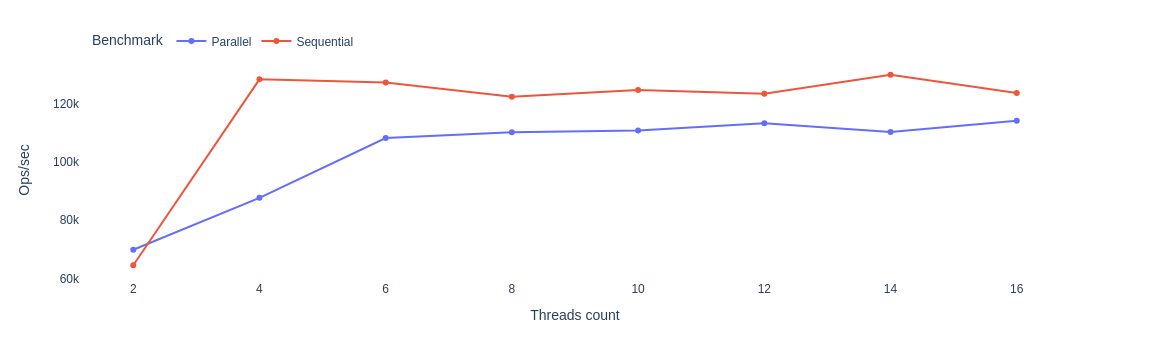

In [37]:
items = 1000
chart = create_chart(scores.loc[scores['size']==items])
write_chart(chart,profile,f'{benchmark}-{items}')
chart

## 100000 items

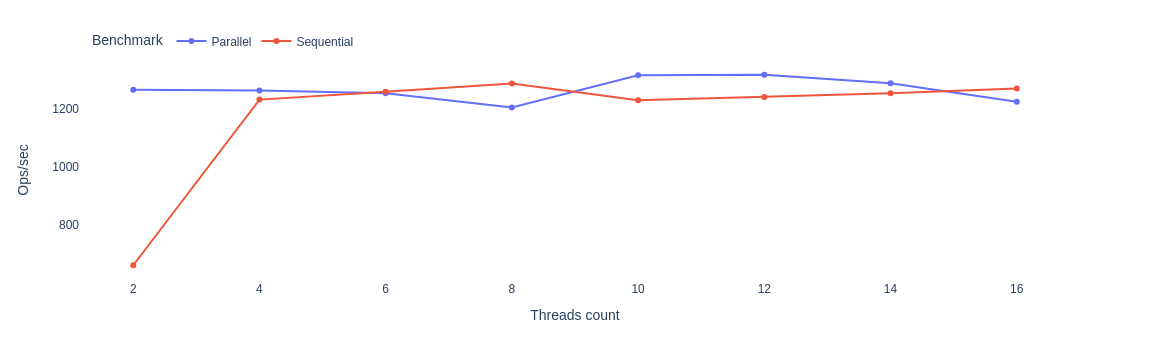

In [38]:
items = 100000
chart = create_chart(scores.loc[scores['size']==items])
write_chart(chart,profile,f'{benchmark}-{items}')
chart

# Grouping

In [39]:
benchmark = 'benchmark-threads-streams-group'
scores = load_results(
    profile, 
    [
        f'{benchmark}-sequential',
        f'{benchmark}-parallel',
        f'{benchmark}-parallel-concurrent'
    ])
scores.loc[scores['benchmark']=='SequentialGroupBenchmark','benchmark'] = 'Sequential'
scores.loc[scores['benchmark']=='ParallelGroupBenchmark','benchmark'] = 'Parallel'
scores.loc[scores['benchmark']=='ParallelGroupConcurrentBenchmark','benchmark'] = 'Parallel concurrent'
scores.sort_values(by=['benchmark','size','threads'],inplace=True)
scores

,benchmark,threads,size,score
0,Parallel,2,1000,"67,150.42"
2,Parallel,4,1000,"96,341.89"
4,Parallel,6,1000,"105,915.60"
6,Parallel,8,1000,"116,848.60"
8,Parallel,10,1000,"121,148.63"
10,Parallel,12,1000,"122,492.67"
12,Parallel,14,1000,"124,566.10"
14,Parallel,16,1000,"124,969.84"
1,Parallel,2,100000,"1,455.44"
3,Parallel,4,100000,"1,481.37"


# 1000 items

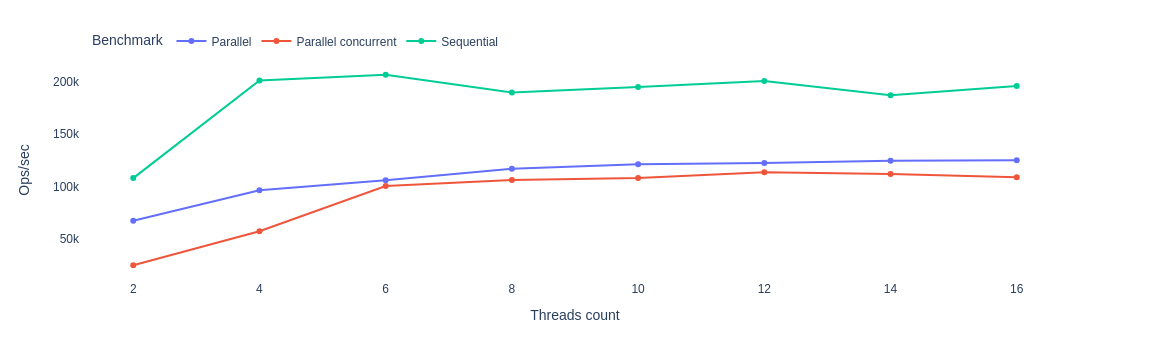

In [40]:
items = 1000
chart = create_chart(scores.loc[scores['size']==items])
write_chart(chart,profile,f'{benchmark}-{items}')
chart

# 100000 items

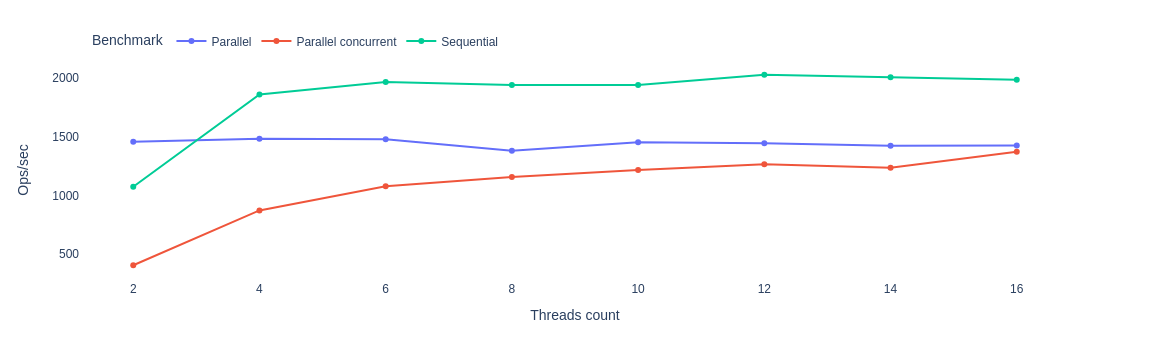

In [41]:
items = 100000
chart = create_chart(scores.loc[scores['size']==items])
write_chart(chart,profile,f'{benchmark}-{items}')
chart

# Filtering and sorting distinct items

In [42]:
benchmark = 'benchmark-threads-streams-filter-sort-distinct'
scores = load_results(
    profile, 
    [
        f'{benchmark}-sequential',
        f'{benchmark}-parallel'
    ])
scores.loc[scores['benchmark']=='SequentialFilterSortDistinctBenchmark','benchmark'] = 'Sequential'
scores.loc[scores['benchmark']=='ParallelFilterSortDistinctBenchmark','benchmark'] = 'Parallel'
scores.sort_values(by=['benchmark','size','threads'],inplace=True)
scores

,benchmark,threads,size,score
0,Parallel,2,1000,"17,524.45"
2,Parallel,4,1000,"22,217.03"
4,Parallel,6,1000,"30,674.24"
6,Parallel,8,1000,"33,732.29"
8,Parallel,10,1000,"32,717.13"
10,Parallel,12,1000,"35,708.70"
12,Parallel,14,1000,"35,820.89"
14,Parallel,16,1000,"35,422.84"
1,Parallel,2,100000,"1,985.80"
3,Parallel,4,100000,"2,346.21"


## 1000 items

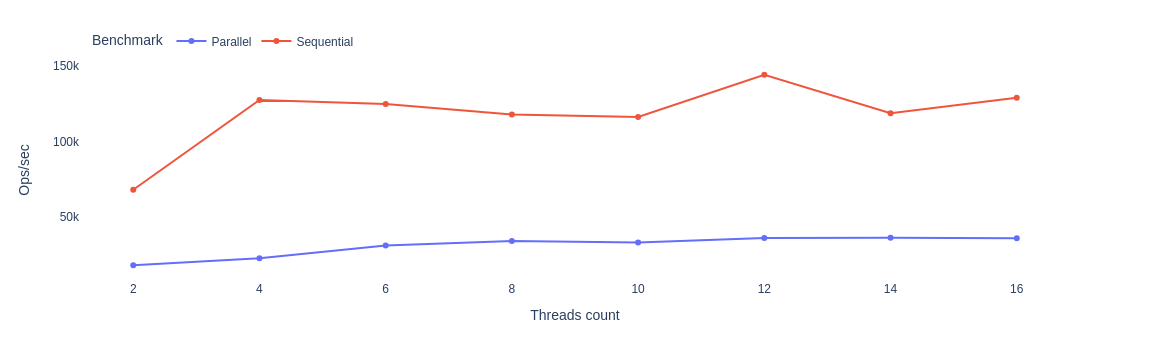

In [43]:
items = 1000
chart = create_chart(scores.loc[scores['size']==items])
write_chart(chart,profile,f'{benchmark}-{items}')
chart

## 100000 items

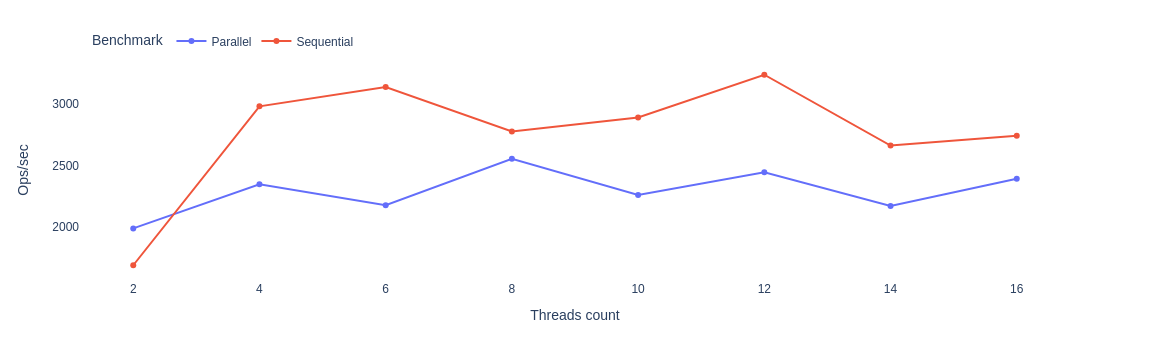

In [44]:
items = 100000
chart = create_chart(scores.loc[scores['size']==items])
write_chart(chart,profile,f'{benchmark}-{items}')
chart